<a href="https://colab.research.google.com/github/YusukeAoki57/diveintocode-ml/blob/master/week4_%E6%8E%88%E6%A5%AD%E5%89%8D%E8%AA%B2%E9%A1%8C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
train= pd.read_csv('drive/My Drive/DIVE INTO CODE/0_課題/2_week3/授業前課題/data/train.csv',dtype = None)
print(train)

        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]


In [ ]:
import numpy as np

問題1 練習のための特徴量の選択

In [ ]:
x_1=train.loc[:,'GrLivArea']
x_2=train.loc[:,'YearBuilt']

x=pd.concat([x_1,x_2],axis=1)
y=train.loc[:,'SalePrice']

#前処理用の結合
xy=pd.concat([x,y],axis=1)

問題2 線形回帰による推定と評価

In [ ]:
#欠損値の確認・削除

x1_mis_par=train.loc[:,'GrLivArea'].isnull().sum()/len(train)*100
print(x1_mis_par)
x2_mis_par=train.loc[:,'YearBuilt'].isnull().sum()/len(train)*100
print(x2_mis_par)
y_mis_par=train.loc[:,'SalePrice'].isnull().sum()/len(train)*100
print(y_mis_par)

#欠損値の削除
xy.dropna(how='all')
print(xy.isnull().sum()/len(train)*100)

0.0
0.0
0.0
GrLivArea    0.0
YearBuilt    0.0
SalePrice    0.0
dtype: float64


(730, 1)
(730,)
(730,)


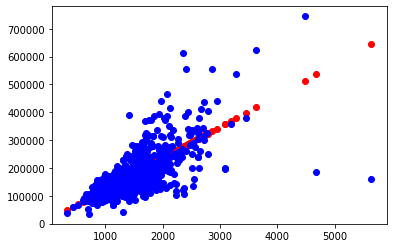

In [ ]:
#線形回帰
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Numpy化
X_1 = xy.iloc[:,0].values.reshape(-1,1)
X_2 = xy.iloc[:,1].values.reshape(-1,1)
Y = xy.iloc[:,2].values

#訓練データとテストデータに分割
y_train,y_test=train_test_split(Y, test_size=0.5,random_state=0)
x_train_1,x_test_1=train_test_split(X_1, test_size=0.5,random_state=0)
x_train_2,x_test_2=train_test_split(X_2, test_size=0.5,random_state=0)
print(x_test_1.shape)
print(y_test.shape)

def Linear(x_train,x_test,y_train):
  lr = LinearRegression()
  lr.fit(x_train, y_train)
  lr.fit(x_train, y_train)
  y_pred = lr.predict(x_test)
  return y_pred

#単回帰
y_pred1=Linear(x_train_1,x_test_1,y_train)
print(y_pred1.shape)
y_pred2=Linear(x_train_2,x_test_2,y_train)


import matplotlib.pyplot as plt
#可視化1
plt.scatter(x_test_1,y_pred1,color='red') #予測値
plt.scatter(x_test_1,y_test,color='blue') #実際

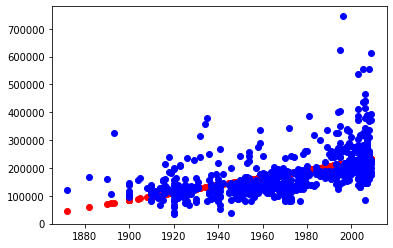

In [ ]:
#可視化2
plt.scatter(x_test_2,y_pred2,color='red') #予測値
plt.scatter(x_test_2,y_test,color='blue') #実際

In [ ]:
#評価
from sklearn.metrics import mean_absolute_error

def evaluation(y_test,y_pred):
  ev=mean_absolute_error(y_test, y_pred)
  return ev

print(evaluation(y_test, y_pred1)) 
print(evaluation(y_test, y_pred2)) 

ev1=evaluation(y_test, y_pred1)
ev2=evaluation(y_test, y_pred2)

"""y_pred1の方が精度が良い"""

37988.008711833565
46049.54261802441


'y_pred1の方が精度が良い'

問題4 他の手法

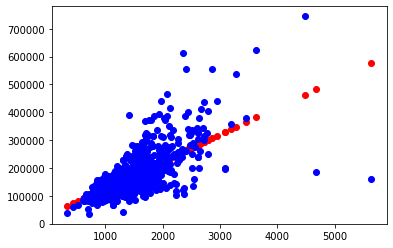

In [ ]:
"""SVM"""
from sklearn import svm

def svr(x_train,x_test,y_train):
  sv = svm.SVR(C=1.0, kernel='linear', epsilon=0.1)    # 正則化パラメータ=1, 線形カーネルを使用
  sv.fit(x_train, y_train)
  y_pred_sv = sv.predict(x_test) 
  return y_pred_sv

#推定
y_pred_sv1=svr(x_train_1,x_test_1,y_train)
y_pred_sv2=svr(x_train_2,x_test_2,y_train)

#図の作成
#可視化1
plt.scatter(x_test_1,y_pred_sv1,color='red') #予測値
plt.scatter(x_test_1,y_test,color='blue') #実際

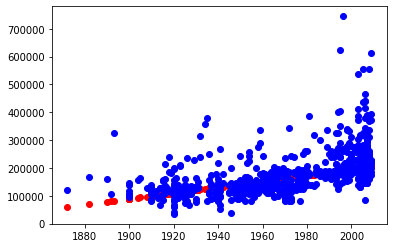

In [ ]:
#SVMの可視化2
plt.scatter(x_test_2,y_pred_sv2,color='red') #予測値
plt.scatter(x_test_2,y_test,color='blue') #実際

In [ ]:
"""決定木"""
from sklearn.tree import DecisionTreeRegressor # 回帰木モデルを作成するクラス
def tree(x_train,x_test,y_train):
  reg = DecisionTreeRegressor(max_leaf_nodes = 20)
  tr = reg.fit(x_train, y_train)
  y_pred_tr = tr.predict(x_test)
  return y_pred_tr

#推定
y_pred_tr1=tree(x_train_1,x_test_1,y_train)
y_pred_tr2=tree(x_train_2,x_test_2,y_train)

#図の作成
#可視化1
plt.scatter(x_test_1,y_pred_tr1,color='red') #予測値
plt.scatter(x_test_1,y_test,color='blue') #実際

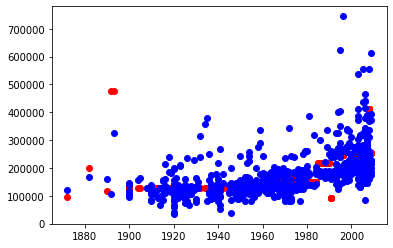

In [ ]:
#Treeの可視化2
plt.scatter(x_test_2,y_pred_tr2,color='red') #予測値
plt.scatter(x_test_2,y_test,color='blue') #実際

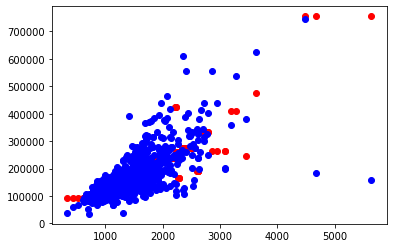

In [ ]:
"""ランダムフォレスト"""
from sklearn.ensemble import RandomForestRegressor as RFR
def rft():
  rf = RFR(n_jobs=-1, random_state=2525)
  rf.fit(x_train,y_train)
  y_pred_rf=rf.predict(x_test)
  return y_pred_rf

#推定
y_pred_rf1=tree(x_train_1,x_test_1,y_train)
y_pred_rf2=tree(x_train_2,x_test_2,y_train)

#図の作成
#可視化1
plt.scatter(x_test_1,y_pred_rf1,color='red') #予測値
plt.scatter(x_test_1,y_test,color='blue') #実際

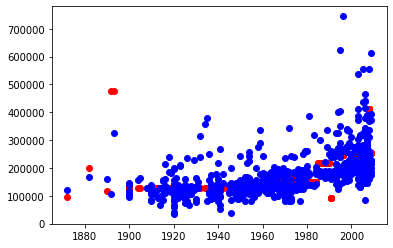

In [ ]:
#RandomTreeの可視化2
plt.scatter(x_test_2,y_pred_rf2,color='red') #予測値
plt.scatter(x_test_2,y_test,color='blue') #実際

In [ ]:
"""各評価"""

#線形回帰


#SVM
ev_sv_1=evaluation(y_test, y_pred_sv1)
ev_sv_2=evaluation(y_test, y_pred_sv2)

#tree
ev_tr_1=evaluation(y_test, y_pred_tr1)
ev_tr_2=evaluation(y_test, y_pred_tr2)


#Randomtree
ev_rf_1=evaluation(y_test, y_pred_rf1)
ev_rf_2=evaluation(y_test, y_pred_rf2)

In [ ]:
#指標値を一つの表にまとめる
list1=[[ev1,ev2],[ev_sv_1,ev_sv_2],[ev_tr_1,ev_tr_2],[ev_rf_1,ev_rf_2]]
df = pd.DataFrame(list1)
df.columns = ['GrLivArea','YearBuilt']
df.index = ['LG','SVM','Tree','RandamTree']
print(df)


               GrLivArea     YearBuilt
LG          37988.008712  46049.542618
SVM         37808.016170  43655.143572
Tree        41237.582576  44974.475988
RandamTree  41237.582576  44974.475988


In [ ]:
"""考察
線形回帰は比較的両特徴量に対して精度が良い。次に良いのはSVM。一方、決定木とランダムフォレストは比較的に精度が悪い。
なお、グラフから読み取れることとして、ランダムフォレストの予測値グラフが直線ではなく、散布図的であったのが興味深かった"""